# Imports

In [72]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import numpy as np

# Default Parameters

In [73]:
figsize = (4, 5) # in inches
fontsize = 10
save_dpi = 300
linewidth = 0.5

rcParams.update({
    'font.size' : fontsize,
    'savefig.dpi' : 300,
    'axes.linewidth' : 0.5,
})

# Data

In [74]:
# data
x = ['cat', 'dog', 'fly', 'mouse', 'human']
y1 = [3, 2, -1, 3, 7]
y2 = [5, 10, -2, 4, 3]

# error
ey1 = [0.5, 0.2, 1, 0.3, 2]
ey2 = [1.5, 0.6, 2, 1.3, 1]

# labeling
ylabel1 = 'units_1'
ylabel2 = 'units_2'

# coloring
colors = ['#edf8fb',
          '#b2e2e2',
          '#66c2a4',
          '#2ca25f',
          '#006d2c']

# Beginner

### plot this
<img src="beginner-bar.png" alt="beginner" width='33%' align='left'/>

(-5, 12)

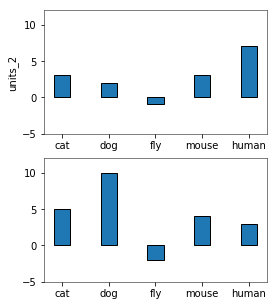

In [75]:
# create figure and axes
fig_beg, axes = plt.subplots(2, 1, figsize=figsize)

ax1 = axes[0]
ax2 = axes[1]

# set up bar spacing
index = np.arange(len(x))
width = 0.35 

# plot separately
ax1.bar(index, y1, width=width, edgecolor='k')
ax2.bar(index, y2, width=width, edgecolor='k')

# give them labels
ax1.set_xticks(index)
ax1.set_xticklabels(x)
ax2.set_xticks(index)
ax2.set_xticklabels(x)

ax1.set_ylabel(ylabel1)
ax1.set_ylabel(ylabel2)

# change limits
ax1.set_ylim([-5, 12])
ax2.set_ylim([-5, 12])

# Advanced
### plot this
<img src="advanced-bar.png" alt="beginner" width='33%' align='left'/>

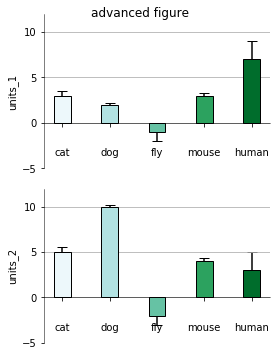

In [76]:
fig_adv, axes = plt.subplots(2, 1, figsize=figsize)

# if subplot is > 2x2, need to unravel axes array
axes = axes.flatten()

# set up bar spacing
index = np.arange(len(x))
width = 0.35 

# pack everything together, and iterate
for i, ax, y, e, label in zip(np.arange(len(axes)), axes, [y1, y2], [ey1, ey2], [ylabel1, ylabel2]):
    
    # plot on each axis at a time
    ax.bar(index, y, 
           width=width,
           color=colors,
           edgecolor='k',
           zorder=2)
    
    # because of negative values, manually move the spine
    ax.spines['bottom'].set_position('zero')
    
    # remove the other spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    # give them axis labels, and change y value
    ax.set_xticks(index)
    ax.set_xticklabels(x, y=-2)
    
    # give them error bars, without the lines
    ax.errorbar(index, y,
                yerr=ey1,
                linestyle='none',
                color='k',
                capsize=5,
                zorder=1) # zorder is less than the bar plot, so the error bars are behind
    
    # set them to have the same ylimits
    ax.set_ylim([-5, 12])
    
    # there are too many tick labels
    ax.locator_params(axis='y', nbins=4)
    
    # draw grid lines (some may not like this)
    ax.yaxis.grid()
    
    # draw y label
    ax.set_ylabel(label)
    
    # give overall title
    fig_adv.suptitle('advanced figure')
    
    # final (automated) adjustments
    fig_adv.tight_layout()

# Save

In [77]:
fig_titles = ['beginner-bar.png', 'advanced-bar.png']
for fig, title in zip([fig_beg, fig_adv], fig_titles):
    fig.savefig(title, dpi=600, transparent=True)